# 추정

## 이항 분포 데이터 만들기

* A를 할때 B일 확률 = p
* A를 N번 했을때 B가 X번 발생할 확률은?

In [1]:
from numpy.random import binomial

In [2]:
# A = 정수기에 얼음을 뜨러갈때
# B = 얼음이 나올 확률
# P = 50%
# N = 정수기 3대
# X = 1
data = binomial(100, 0.3, 50) # N=100, p=.3에서 50번 데이터를 추출

In [3]:
data

array([32, 26, 31, 30, 35, 26, 32, 23, 34, 30, 31, 35, 29, 26, 33, 33, 32,
       38, 33, 29, 38, 24, 34, 25, 33, 22, 29, 32, 33, 25, 24, 33, 24, 29,
       33, 38, 29, 27, 31, 30, 33, 30, 32, 34, 28, 32, 25, 28, 32, 36])

In [4]:
import seaborn

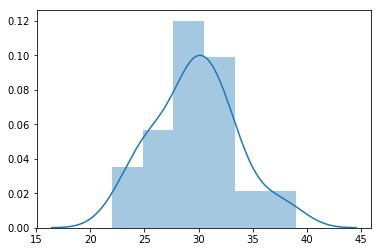

In [16]:
seaborn.distplot(data)

## 최적화를 이요한 파라미터 추정

### 최적화
* 제약조건 아래서 목표함수를 최대/최소화 하는것
* y = a(p) 일때 y 가 최대/최소가 되는 p값을 찾는것

### 파라미터 추정
* 분포 / 모형의 파라미터를 추정하는 것
* 오차가 가장 작아지는 파라미터를 찾는것

### How? Mean Square Error (평균 오차 제곱)
* 가장 많이 쓰임
* 연속변수를 예측할때 (이항분포 X)
* 오차 = 예측과 실제의 차이
* 평균 오차 제곱이 최소화 되도록 파라미터를 추정
* 모든 예측을 평균으로 하면 MSE = 분산
    * 분산이 큼 = 전체를 평균값으로 예측한 경우 오차가 큼
    * 분산이 작음 = 전체를 평균값으로 예측한 경우 오차가 작음

## 정규분포 데이터 만들기

In [9]:
from numpy.random import normal

In [10]:
data = normal(50, 15, 100)

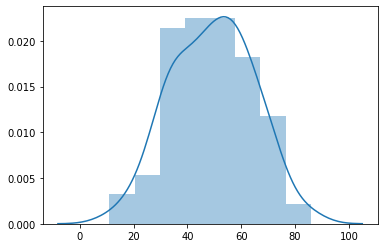

In [11]:
seaborn.distplot(data)

## 추정한 평균에 따라 MSE 구하기

In [12]:
import numpy

In [13]:
평균 = 99

In [14]:
numpy.mean((data - 평균) ** 2)  # MSE

2700.8117279266025

정규분포에서 나온 데이터가 있을 때 모분포의 평균을 어떻게 추정하나?
MSE가 가장 작아지는 예측값을 모분포의 평균으로 추정
(수학적인 이유로 데이터의 평균이 MSE가 가장 작음)
(그래서 데이터의 평균이 모분포의 평균에 대한 가장 좋은 추정치가 됨)

## MSE를 최소화하는 예측값 구하기

In [16]:
from scipy.optimize import minimize

In [17]:
# 예측에 평균값을 넣으면 MSE가 가장 작아짐

def mse(m):
    return numpy.mean((data - m) ** 2)

In [18]:
# 추정한 최적값 = minimize(함수, 초기값)
minimize(mse, 100)

      fun: 227.4992648640425
 hess_inv: array([[0.49999993]])
      jac: array([-5.7220459e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([49.26758916])

In [20]:
# 수학적인 최적값
numpy.mean(data)

49.267591421060594

## MAE를 최소화하는 예측값 구하기

하지만 MAE의 추정값은 여러개가 될 수 있음 -> MSE 를 더 많이 씀

In [21]:
def mae(m):
    return numpy.mean(numpy.abs(data - m))

In [22]:
minimize(mae, 100)

      fun: 12.466960604820374
 hess_inv: array([[50.80821112]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 2
     njev: 8
   status: 0
  success: True
        x: array([49.69987051])

## 선형 모형의 파라미터 구하기

In [106]:
연기력 = numpy.array([4, 4, 3, 5, 2])

In [86]:
흥행 = numpy.array([5, 4, 3, 5, 1])

In [93]:
def mse(param):
    a, b = param
    예측 = 연기력 * a + b
    return numpy.mean((흥행 - 예측) ** 2)

In [107]:
minimize(mse, [1, 2])

      fun: 0.24615384615384853
 hess_inv: array([[ 0.48076926, -1.73076933],
       [-1.73076933,  6.7307696 ]])
      jac: array([ 9.31322575e-09, -1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 1.38461534, -1.38461524])

In [90]:
mse(2, 1)

21.8

### 실습: 배달식당의 배달속도와 맛에 따른 별점 예측

In [24]:
배달속도 = numpy.array([1, 2, 3, 4, 5])
맛 = numpy.array([5, 2, 5, 2, 3])
별점 = numpy.array([4, 1, 5, 2, 3])

def mse(param):
    a, b, c = param
    예측 = 배달속도 * a + 맛 * b + c
    return numpy.mean((별점 - 예측) ** 2)

mse((1, 2, 3))

97.4

In [25]:
minimize(mse, (1, 1, 1))

      fun: 0.03368421052644218
 hess_inv: array([[ 0.30261666,  0.13153178, -1.35472174],
       [ 0.13153178,  0.32879919, -1.51146053],
       [-1.35472174, -1.51146053,  9.69109502]])
      jac: array([-2.08243728e-06, -2.18814239e-06, -6.88713044e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([ 0.35263154,  1.13157893, -1.90526333])

## 독립변수가 2개인 선형 모형

In [26]:
내가_상대를 = numpy.array([3,5,3,5,5,2,5,4,0,5]) 
상대가_나를 = numpy.array([3,2,5,5,5,5,5,4,5,0])
연애가_잘 = numpy.array([0,1,4,3,0,0,5,3,0,0])

In [27]:
def mse(param):
    a, b, c = param
    예측 = a * 내가_상대를 + b*상대가_나를 + c
    return numpy.mean((연애가_잘 - 예측) ** 2)

In [28]:
minimize(mse, [0,0,3])

      fun: 2.1063515269661615
 hess_inv: array([[ 0.21862405,  0.07527722, -1.10245981],
       [ 0.07527722,  0.21247388, -1.10723072],
       [-1.10245981, -1.10723072,  8.89741746]])
      jac: array([ 1.96695328e-06, -1.96695328e-06,  5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 35
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 0.60347644,  0.63986315, -3.12832911])

## 우도 (Likelihood)

* 모형과 파라미터를 가정했을 때 현재 데이터 D가 관찰될 확률
* P(D|M)
* 특정한 경우, 확률 중에서도 특정 데이터가 관찰될 확률

### 최대우도법 (Maximum Likelihood)

우도를 최대로 하는 파라미터를 찾는 방법

## ML로 이항분포의 파라미터 구하기

In [29]:
from scipy.stats import binom

In [30]:
# ex) 앞면이 나올 확률이 20% 인 동전을 두번 던졌을때 앞면이 나올 확률은?
data = binomial(2, .2, 100)

In [31]:
data

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
# 앞면이 나올 확률이 50%인 동전 2개를 던졌을때 앞면이 0개 나올 확률은?
binom.pmf(0, 2, 0.5)

0.25

In [33]:
binom.pmf([0, 1, 2], 2, 0.5)

array([0.25, 0.5 , 0.25])

### 로그 우도 (Log Likelihood)

* 많은 우도를 곱할 경우 뒷자리가 떨어져 나가서 정확하지 않음
* 로그 우도를 쓰면 계산이 더 정확하고 간편함

In [35]:
data = binomial(2, .2, 100)
p = 0.5

In [37]:
# 우도의 로그의 합 = 우도의 곱의 로그

likelihood = binom.pmf(data, 2, p)
numpy.sum(numpy.log(likelihood))

-106.74466580623158

In [39]:
def lk(p):
    like = binom.pmf(data, 2, p)
    return -numpy.sum(numpy.log(like))  # 우도의 로그의 합 = 우도의 곱의 로그

In [40]:
minimize(lk, .5, bounds=[(0.01, 0.99)])

      fun: 82.72661312052674
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.56319402e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 5
   status: 0
  success: True
        x: array([0.25999999])

## ML로 로지스틱 선형 모형 파라미터 구하기

In [41]:
from scipy.special import expit  # 로지스틱

### 예시 1

In [47]:
찌개 = numpy.array([5, 1, 3, 4, 5, 3]) # 김치찌개 5 4 3 2 1 된장찌개
커피 = numpy.array([0, 1, 0, 1, 1, 1]) # 아메리카노: 1, 라떼 = 0

In [48]:
a = 0.3
b = 0.2

예측 = expit(찌개 * a + b)
예측

array([0.84553473, 0.62245933, 0.75026011, 0.80218389, 0.84553473,
       0.75026011])

In [49]:
# 커피 예측 결과에 대한 우도
# 아메리카노(1) 인 경우 예측갑 그대로
# 라떼(0)인 경우 (1-예측값)

[0.16, 0.62, 0.25, 0.80, 0.84, 0.75]

[0.16, 0.62, 0.25, 0.8, 0.84, 0.75]

### 예시 2

In [42]:
실력 = numpy.array([1, 5, 3, 4, 5, 3])  
합격 = numpy.array([0, 1, 0, 0, 1, 1]) # 합격 1, 불합격 0

In [50]:
예측 = expit(실력 * a + b)
예측

array([0.62245933, 0.84553473, 0.75026011, 0.80218389, 0.84553473,
       0.75026011])

In [52]:
# 탈락한 사람의 우도만 보기
합격자우도 = numpy.log(예측) * 합격
합격자우도

array([-0.        , -0.16778603, -0.        , -0.        , -0.16778603,
       -0.28733533])

In [54]:
# 탈락한 사람의 우도만 보기
탈락자우도 = numpy.log(1 - 예측)*(1 - 합격)
탈락자우도

array([-0.97407698, -0.        , -1.38733533, -1.62041741, -0.        ,
       -0.        ])

In [55]:
우도 = 합격자우도 + 탈락자우도
우도

array([-0.97407698, -0.16778603, -1.38733533, -1.62041741, -0.16778603,
       -0.28733533])

In [56]:
def lk(param):
    a, b = param
    합격확률 = expit(a * 실력 + b)  # 로지스틱 선형 모형
    
    합격자우도 = numpy.log(합격확률) * 합격
    탈락자우도 = numpy.log(1-합격확률) * (1-합격)
    우도 = 합격자우도 + 탈락자우도
    return -numpy.sum(우도)

In [57]:
minimize(lk, [0,0])

      fun: 2.8550135317560628
 hess_inv: array([[ 1.08423602, -3.96722068],
       [-3.96722068, 15.55616106]])
      jac: array([-2.86102295e-06, -1.25169754e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([ 1.30380162, -4.70457229])

## MSE로 로지스틱 선형 모형 파라미터 구하기

In [58]:
def mse(param):
    a, b = param
    합격확률 = expit(a * 실력 + b)  # 로지스틱 선형 모형
    
    return numpy.mean((합격확률 - 합격) ** 2)

In [59]:
minimize(mse, [0, 0])

      fun: 0.16364995295643134
 hess_inv: array([[ 12.63181536, -49.86185941],
       [-49.86185941, 210.55609665]])
      jac: array([-9.39518213e-06, -3.57255340e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 13
     njev: 15
   status: 0
  success: True
        x: array([ 1.03872501, -3.84403032])

## 자동차 데이터에 선형 모형 적용

데이터: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [60]:
import pandas

In [64]:
df = pandas.read_csv('imports-85.data', header=None)

In [65]:
안전등급 = df[0]
연비 = df[24]

In [66]:
def mse(param):
    a, b = param
    예측 = a * 연비 + b 
    return numpy.mean((안전등급 - 예측)**2)

In [67]:
minimize(mse, [0, 0])

      fun: 1.5413761440213387
 hess_inv: array([[ 0.01059507, -0.32581132],
       [-0.32581132, 10.51909557]])
      jac: array([0.00000000e+00, 1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([0.00625781, 0.6417112 ])

## Scikit-Learn의 선형 모형 함수로 파라미터 구하기

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
m = LinearRegression().fit(df[[23, 24]], 안전등급)

In [70]:
m.coef_

array([-0.23391805,  0.22211124])